In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Function to compute 1D-DFT from scratch
def dft1d(x):

    # From scratch computing the Discrete Fourier Transform (DFT) of a 1D array .
    # Complexity: O(N^2)
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

x = np.array([1, 2, 3, 4])
print("Manual DFT:", dft1d(x))

x = np.fft.fft(x)
print("Buildin function:",x)


Manual DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
Buildin function: [10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [83]:
print(x)
X=np.fft.fft(x)
print(X)

[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[ 4.+0.j 16.+0.j 12.+0.j  8.+0.j]


In [84]:
# x[start:stop:step]
# everytime +step to get the index
# array[start:stop]
# factor[:N//2] starts from 0 to N/2-1

x = np.array([1, 2, 3, 4])
# Function to compute 1D-FFT from scratch
def fft1d(x):
    # Compute the Fast Fourier Transform (FFT) of a 1D array x manually.
    # Complexity: O(N log N)
    N = len(x)
    if (N <= 1):
        return x
    if(N % 2 != 0):
        raise ValueError("Size of x must be a power of 2 for this FFT implementation.")
    
    # Divide into even and odd parts
    X_even = fft1d(x[::2])
    X_odd = fft1d(x[1::2])
    
    # Combine results
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([
        X_even + factor[:N//2] * X_odd,
        X_even + factor[N//2:] * X_odd
    ])

# Example
x = np.array([1, 2, 3, 4])
print("Manual FFT:", fft1d(x))


Manual FFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]


In [85]:
# function to compute 2D-FFT from scratch
def fft2d(image):
    # FFT on rows
    row_fft = np.array([fft1d(row) for row in image])
    # FFT on columns
    col_fft = np.array([fft1d(col) for col in row_fft.T]).T
    return col_fft


In [86]:

# 128 by 128
img = cv2.imread('Image/image43.jpeg', 0)
img=cv2.resize(img,(128,128))
# Function to compute 2D-DFT from scratch
def dft2d(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    sum_val += image[x, y] * np.exp(-2j * np.pi * ((u*x)/M + (v*y)/N))
            dft_result[u, v] = sum_val
    return dft_result

dft=dft2d(img)
dft_shift = np.fft.fftshift(dft)
magnitude_dft = np.abs(dft_shift)
log_magnitude_dft = 20 * np.log(magnitude_dft + 1)


fft=fft2d(img)
fft_shift = np.fft.fftshift(fft)
magnitude_fft = np.abs(fft_shift)
log_magnitude_fft = 20 * np.log(magnitude_fft + 1)


fft_builtin = np.fft.fft2(img)
fft_shift_builtin = np.fft.fftshift(fft_builtin)  # shift zero frequency to center
magnitude_builtin = np.abs(fft_shift_builtin)
log_magnitude_builtin = 20 * np.log(magnitude_builtin + 1)

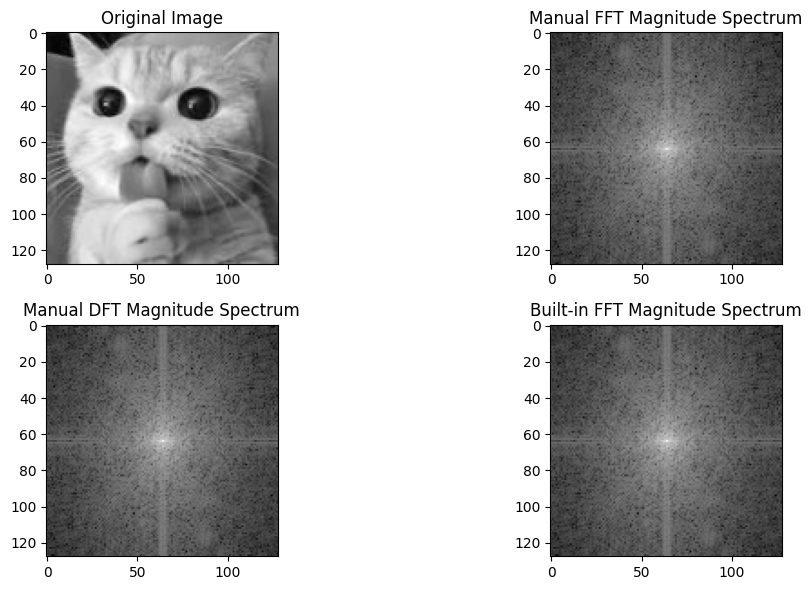

In [87]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(log_magnitude_fft, cmap='gray')
plt.title("Manual FFT Magnitude Spectrum")

plt.subplot(2,2,3)
plt.imshow(log_magnitude_dft, cmap='gray')
plt.title("Manual DFT Magnitude Spectrum")

plt.subplot(2,2,4)
plt.imshow(log_magnitude_builtin, cmap='gray')
plt.title("Built-in FFT Magnitude Spectrum")

plt.tight_layout()
plt.show()